In [71]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["JAX_ENABLE_X64"] = "True"


In [72]:
from functools import partial

import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

from jax import jit as jjit 
from jax import vmap

from bpd.prior import sample_ellip_prior, shear_transformation, ellip_mag_prior
from bpd.likelihood import shear_loglikelihood, shear_loglikelihood_unreduced


In [73]:
g1, g2 = 0.02, 0.02
true_g = jnp.array([g1, g2])

In [74]:
seed = 42
key = random.key(seed)
k1, k2 = random.split(key, 2)

In [75]:
sigma_e=1e-3
sigma_e_int = 4e-2

In [76]:
ellips = sample_ellip_prior(key, sigma=sigma_e, n=1000)
ellips_sheared = shear_transformation(ellips, (g1, g2))
ellips.shape, ellips_sheared.shape

((1000, 2), (1000, 2))

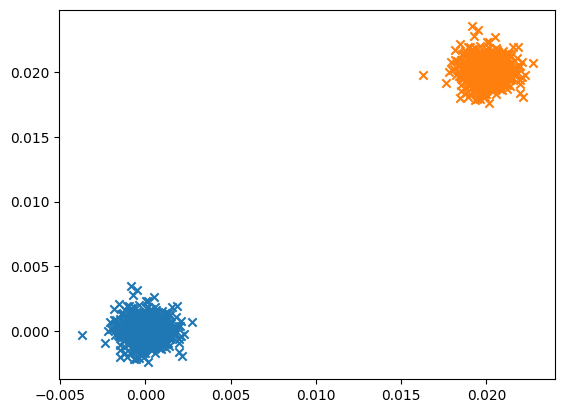

In [77]:
plt.scatter(ellips[:, 0], ellips[:, 1], marker='x')
plt.scatter(ellips_sheared[:, 0], ellips_sheared[:, 1], marker='x')

In [78]:
# here we assume no observation noise, only 1 sample is needed
e_post = ellips_sheared.reshape(-1, 1, 2)
e_post.shape

(1000, 1, 2)

In [79]:
prior = partial(ellip_mag_prior, sigma=sigma_e)
interim_prior = partial(ellip_mag_prior, sigma=sigma_e_int)

In [80]:
# NOTE: what does it mean to use an interim prior when we don't infer from it? 
likelihood = jjit(partial(shear_loglikelihood, prior=prior, interim_prior=interim_prior)) 

In [81]:
# compile
likelihood(true_g, e_post)

Array(-218.62124169, dtype=float64)

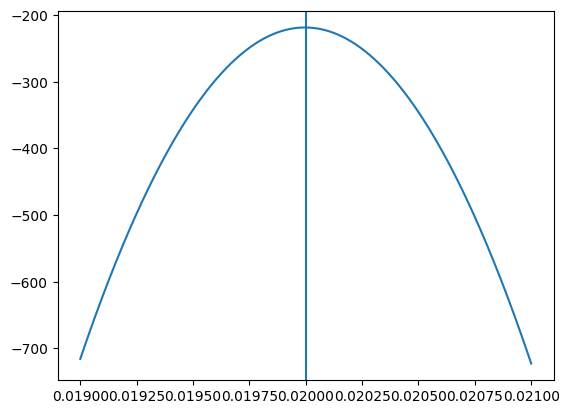

In [82]:
g1s = jnp.linspace(0.019, 0.021, 1000)
gs = jnp.stack([g1s, jnp.full_like(g1s, g2)], axis=-1)
plt.plot(g1s, vmap(likelihood, in_axes=(0, None))(gs, e_post))
plt.axvline(0.02)

In [ ]:
# find optimum function

In [ ]:
# calculate fisher information matrix to compute std error estimated